<a href="https://colab.research.google.com/github/khalil-bagbag/Prediction-Sportsmanship-cars-/blob/main/Prediction_with_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from tensorflow import keras

base_model = keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
base_model.trainable = False

In [ ]:
from tensorflow.keras import activations
inputs = keras.Input(shape=(224, 224, 3))
# Separately from setting trainable on the model, we set training to ase 
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(1,activation=activations.sigmoid)(x)
model = keras.Model(inputs, outputs)

In [ ]:
# Important to use binary crossentropy and binary accuracy as we now have a binary classification problem
model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True), metrics=[keras.metrics.BinaryAccuracy()])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create a data generator
datagen = ImageDataGenerator(
        featurewise_center=True,  # set input mean to 0 over the dataset
        samplewise_center=True,  # set each sample mean to 0
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False) # we don't expect Bo to be upside-down so we will not flip vertically

In [ ]:
# load and iterate training dataset
train_it = datagen.flow_from_directory('/content/gdrive/My Drive/Cars/train/', 
                                       target_size=(224, 224), 
                                       color_mode='rgb', 
                                       class_mode='binary', 
                                       batch_size=8)
# load and iterate test dataset
test_it = datagen.flow_from_directory('/content/gdrive/My Drive/Cars/test/', 
                                      target_size=(224, 224), 
                                      color_mode='rgb', 
                                      class_mode='binary', 
                                      batch_size=8)

Found 116 images belonging to 2 classes.
Found 42 images belonging to 2 classes.


In [ ]:
model.fit(train_it, steps_per_epoch=12, validation_data=test_it, validation_steps=4, epochs=10)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:5017: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`binary_crossentropy` received `from_logits=True`, but the `output`'


12/12 [==============================] - 86s 5s/step - loss: 1.9464 - binary_accuracy: 0.4457 - val_loss: 1.1117 - val_binary_accuracy: 0.5938
Epoch 2/10
12/12 [==============================] - 8s 668ms/step - loss: 1.3954 - binary_accuracy: 0.5217 - val_loss: 1.5021 - val_binary_accuracy: 0.6562
Epoch 3/10
12/12 [==============================] - 3s 225ms/step - loss: 1.0743 - binary_accuracy: 0.6304 - val_loss: 0.9574 - val_binary_accuracy: 0.6875
Epoch 4/10
12/12 [==============================] - 2s 186ms/step - loss: 0.9427 - binary_accuracy: 0.7174 - val_loss: 0.7504 - val_binary_accuracy: 0.6562
Epoch 5/10
12/12 [==============================] - 2s 193ms/step - loss: 0.5409 - binary_accuracy: 0.8043 - val_loss: 0.9275 - val_binary_accuracy: 0.6875
Epoch 6/10
12/12 [==============================] - 2s 194ms/step - loss: 0.4690 - binary_accuracy: 0.8478 - val_loss: 0.6250 - val_binary_accuracy: 0.7188
Epoch 7/10
12/12 [==============================] - 2s 193ms/step - loss: 0.4

In [ ]:
# Unfreeze the base model
base_model.trainable = True

# It's important to recompile your model after you make any changes
# to the `trainable` attribute of any inner layer, so that your changes
# are taken into account
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate = .00001),  # Very low learning rate
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

In [ ]:
model.fit(train_it, steps_per_epoch=11, validation_data=test_it, validation_steps=4, epochs=10)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:5017: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`binary_crossentropy` received `from_logits=True`, but the `output`'


Epoch 1/10
11/11 [==============================] - 8s 360ms/step - loss: 0.3239 - binary_accuracy: 0.8810 - val_loss: 0.4757 - val_binary_accuracy: 0.8750
Epoch 2/10
11/11 [==============================] - 2s 215ms/step - loss: 0.2111 - binary_accuracy: 0.9091 - val_loss: 0.4304 - val_binary_accuracy: 0.8438
Epoch 3/10
11/11 [==============================] - 2s 218ms/step - loss: 0.0727 - binary_accuracy: 0.9643 - val_loss: 0.5073 - val_binary_accuracy: 0.8438
Epoch 4/10
11/11 [==============================] - 2s 213ms/step - loss: 0.0314 - binary_accuracy: 0.9881 - val_loss: 0.5389 - val_binary_accuracy: 0.9062
Epoch 5/10
11/11 [==============================] - 2s 219ms/step - loss: 0.0106 - binary_accuracy: 1.0000 - val_loss: 0.8096 - val_binary_accuracy: 0.8750
Epoch 6/10
11/11 [==============================] - 3s 227ms/step - loss: 0.1158 - binary_accuracy: 0.9432 - val_loss: 0.4252 - val_binary_accuracy: 0.9062
Epoch 7/10
11/11 [==============================] - 3s 226ms/ste

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

def make_predictions(image_path):
    show_image(image_path)
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    image = preprocess_input(image)
    preds = model.predict(image)
    return preds

array([[1.1275295e-05]], dtype=float32)

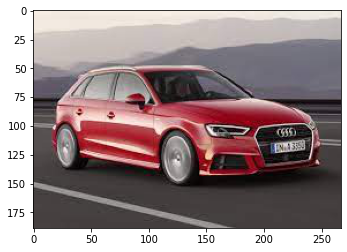

In [ ]:
make_predictions('/content/gdrive/My Drive/mobmod/Afla_Romeo_Audi/AUDI_A3/AUDI_A3.jpeg')

array([[0.9999051]], dtype=float32)

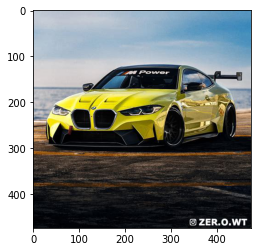

In [ ]:
make_predictions('/content/gdrive/My Drive/mobmod/Bently_Citroen/BMW M4/001_fdc8f8ba.jpg')

0.99084747

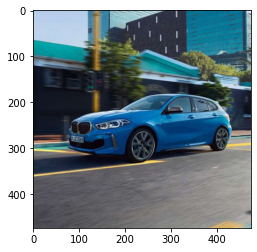

In [ ]:
make_predictions('/content/gdrive/My Drive/mobmod/Bently_Citroen/BMW I SERIE I /002_7ca86f8a.jpg')[0][0]

In [ ]:
alpha_audi=['ALFA ROMEO 159', 'ALFA ROMEO 4C', 'ALFA ROMEO AR8C SPIDER', 'ALFA ROMEO BRERA ', 'ALFA ROMEO GIULIETTA ', 'ALFA ROMEO MITO ', 'ALFA ROMEO SPIDER ', 'AUDI A1', 'AUDI S1', 'AUDI A1 SPORTBACK', 'AUDI S1 SPORTBACK', 'AUDI A3', 'AUDI S3', 'AUDI A3 CABRIOLET', 'AUDI S3 CABRIOLET', 'AUDI A3 LIMOUSINE', 'AUDI S3 LIMOUSINE', 'AUDI A3 SPORTBACK', 'AUDI S3 SPORTBACK', 'AUDI A3 SPORTBACK E-TRON', 'AUDI RS 3 SPORTBACK', 'AUDI A4 AVANT', 'AUDI S4 AVANT', 'AUDI A4 ALLROAD QUATTRO', 'AUDI A4 LIMOUSINE', 'AUDI S4 LIMOUSINE', 'AUDI A5 COUPE', 'AUDI S5 COUPE', 'AUDI A5 CABRIOLET', 'AUDI S5 CABRIOLET', 'AUDI A5 SPORTBACK', 'AUDI S5 SPORTBACK', 'AUDI A6 AVANT', 'AUDI S6 AVANT', 'AUDI RS 6 AVANT', 'AUDI A6 ALLROAD QUATTRO', 'AUDI A6 LIMOUSINE', 'AUDI S6 LIMOUSINE', 'AUDI A7 SPORTBACK', 'AUDI S7 SPORTBACK', 'AUDI RS 7 SPORTBACK', 'AUDI A8L', 'AUDI A8LW12', 'AUDI A8', 'AUDI S8', 'AUDI Q3', 'AUDI Q5', 'AUDI SQ5 TDI', 'AUDI Q7', 'AUDI R8 COUPE', 'AUDI R8 SPYDER', 'AUDI TT COUPE ', 'AUDI TT ROADSTER ', 'AUDI TTS ROADSTER ']

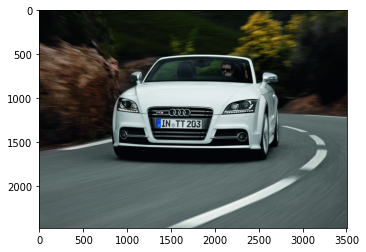

In [ ]:
import re
import os
from os import listdir
from os.path import isfile, join
resultat_alpha_audi = {}
for i in range(len(alpha_audi)):
  dossier=re.sub(r' ', r'_',alpha_audi[i])
  pathe='/content/gdrive/My Drive/mobmod/Afla_Romeo_Audi/'+dossier
  nom_voiture = [f for f in listdir(pathe) if isfile(join(pathe, f))]
  path_finale=pathe+'/'+str(nom_voiture[0])
  res=(make_predictions(path_finale))
  resultat_alpha_audi[alpha_audi[i]] = res[0][0]

In [ ]:
resultat_alpha_audi

{'ALFA ROMEO 159': 0.9999976,
 'ALFA ROMEO 4C': 0.99957997,
 'ALFA ROMEO AR8C SPIDER': 0.99911803,
 'ALFA ROMEO BRERA ': 8.1256534e-05,
 'ALFA ROMEO GIULIETTA ': 4.9433485e-05,
 'ALFA ROMEO MITO ': 0.7670209,
 'ALFA ROMEO SPIDER ': 0.0002704384,
 'AUDI A1': 3.7358484e-06,
 'AUDI A1 SPORTBACK': 0.00019906732,
 'AUDI A3': 1.1275295e-05,
 'AUDI A3 CABRIOLET': 0.7384363,
 'AUDI A3 LIMOUSINE': 8.921855e-10,
 'AUDI A3 SPORTBACK': 1.8648728e-07,
 'AUDI A3 SPORTBACK E-TRON': 3.7685933e-08,
 'AUDI A4 ALLROAD QUATTRO': 1.2873562e-06,
 'AUDI A4 AVANT': 0.76656723,
 'AUDI A4 LIMOUSINE': 1.6988979e-07,
 'AUDI A5 CABRIOLET': 0.029372837,
 'AUDI A5 COUPE': 0.00027164264,
 'AUDI A5 SPORTBACK': 2.2237828e-05,
 'AUDI A6 ALLROAD QUATTRO': 0.35730377,
 'AUDI A6 AVANT': 1.3354092e-08,
 'AUDI A6 LIMOUSINE': 0.00018359208,
 'AUDI A7 SPORTBACK': 0.97274786,
 'AUDI A8': 0.00019879987,
 'AUDI A8L': 0.00019879987,
 'AUDI A8LW12': 0.00076645863,
 'AUDI Q3': 1.2482078e-06,
 'AUDI Q5': 4.380441e-05,
 'AUDI Q7': 3.5